# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# noduplicate_mouse = mouse_metadata.drop_duplicates('Mouse ID', keep='last', inplace=False)
# noduplicate_results = study_results.drop_duplicates('Mouse ID', keep='last', inplace=False)

In [3]:
# Combine the data into a single dataset
new = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge_data = new[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']]
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
len(merge_data['Mouse ID'].unique())

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_results = study_results[study_results.duplicated(subset = ['Mouse ID','Timepoint'])]
duplicate_results['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = merge_data.loc[merge_data['Mouse ID'] != 'g989']
new_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
# Checking the number of mice in the clean DataFrame.
len(new_data['Mouse ID'].unique())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [15]:
regimen = new_data.groupby('Drug Regimen')
tumor_summary = pd.DataFrame({'Mean Tumor Volume':regimen['Tumor Volume (mm3)'].mean(),
                             'Median Tumor Volume':regimen['Tumor Volume (mm3)'].median(),
                             'Tumor Volume Variance':regimen['Tumor Volume (mm3)'].var(),
                             'Tumor Volume Std. Dev.':regimen['Tumor Volume (mm3)'].std(),
                             'Tumor Volume Std. Err.':regimen['Tumor Volume (mm3)'].sem()})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [17]:
regimen[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

(0.0, 30.0)

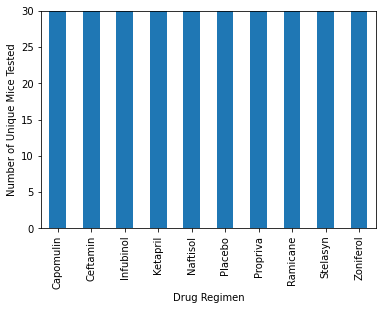

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen['Mouse ID'].count()
regimen_count.plot(kind="bar")
plt.ylabel("Number of Unique Mice Tested")
plt.ylim(0,30)

<function matplotlib.pyplot.show(close=None, block=None)>

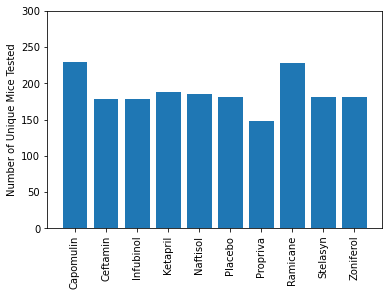

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
regimen_list = regimen_count.index.to_list()
plt.bar(regimen_list,regimen_count)
plt.ylabel("Number of Unique Mice Tested")
plt.ylim(0,300)
plt.xticks(rotation = 'vertical')
plt.show

Text(0, 0.5, 'Sex')

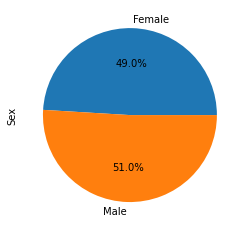

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_grouped = new_data.groupby('Sex')
sex_count = sex_grouped['Mouse ID'].count()
sex_count.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

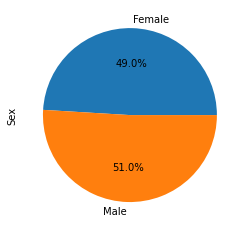

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=['Female','Male'], autopct='%1.1f%%')
plt.ylabel("Sex")

# Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_mouse_grouped = new_data.groupby("Drug Regimen")
regimen_mouse_grouped = regimen_mouse_grouped.last()
# Start by getting the last (greatest) timepoint for each mouse
best_regis = [b for b in treatment_list]
best_regimens = regimen_mouse_grouped['Tumor Volume (mm3)'][best_regis]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_output = pd.DataFrame(best_regimens)
best_output.loc[("Capomulin"),['Tumor Volume (mm3)']]

NameError: name 'treatment_list' is not defined

In [173]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    new_output = best_output.loc[(drug),['Tumor Volume (mm3)']]
    tumor_vol_list.append(new_output)
    pd.DataFrame(tumor_vol_list)
    
    quartiles = new_output.quantile([.25,.5,.75])
#     print(quartiles)
    lowerq = quartiles[0.25]
#     print(lowerq)
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
#     print(iqr)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    print(f"The IQR for regimen at 'Best Regimen' List Item {drug} is {iqr}'.")
    if (lower_bound < new_output.min()) & (upper_bound > new_output.max()):
        print(f"\tThere are no outliers at 'Best Regimen' List Item {drug}'.")
    else:
        print(f"\tThere is at least 1 outlier at 'Best Regimen' List Item {drug}'.")    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
  
    # Determine outliers using upper and lower bounds


The IQR for regimen at 'Best Regimen' List Item Capomulin is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Capomulin'.
The IQR for regimen at 'Best Regimen' List Item Ramicane is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Ramicane'.
The IQR for regimen at 'Best Regimen' List Item Infubinol is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Infubinol'.
The IQR for regimen at 'Best Regimen' List Item Ceftamin is 0.0'.
	There is at least 1 outlier at 'Best Regimen' List Item Ceftamin'.


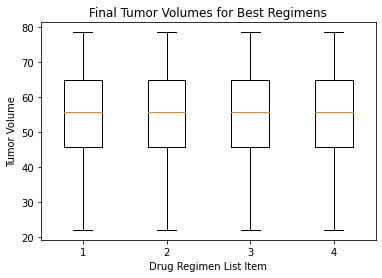

In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for Best Regimens')
ax1.set_xlabel('Drug Regimen List Item')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

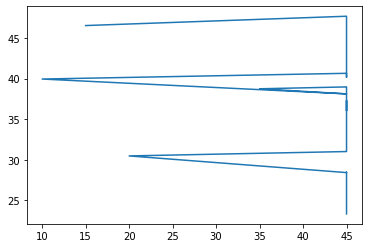

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = new_data.loc[new_data['Drug Regimen']=='Capomulin']
plt.plot(Capomulin_data['Timepoint'],Capomulin_data['Tumor Volume (mm3)'])


In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen